<a href="https://colab.research.google.com/github/mohansameer1983/NLP/blob/main/MMAI_2022_891_Individual_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 891: Individual Assignment

Version 1: Updated February 9, 2022

<font color='red'>\# TODO: fill in the below</font>

- [Sameer, Mohan]
- [20309780]
- [Section 1]
- [Greenlight]
- [22-04-2022]

# Assignment Instructions

This assignment contains one (1) question with multiple parts and one (1) optional question for bonus marks. The questions and parts are wholly contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers/solutions. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

## Questions

Each question has multiple tasks. There are two possible types of tasks: tasks that require you to write code and tasks that require you to write text responses. A grading rubric is provided on D2L for each question.

For tasks that require **code**:
- Use Python to complete the task.
- You may use standard Python libraries, including scikit-learn, pandas, and numpy.
- Tips:
  - Submit code that runs without errors.
  - Submit code that is reproducible. E.g., set random number seeds as appropriate. You should be able to run your code again and again and again, from the top of the file to the bottom of the file, and get the exact same results each time. I should be able to run your code, from scratch, again and again, and get the exact same results that you get.
  - Submit code that is organized. Make your code readable. Provide comments to describe what the code is doing and why. Don’t leave “old” code lying around. Overall, if your code is clear and easy to read, then we will be happy. When we are happy, we give better marks.

For tasks that require **text responses**:
- Type your response in Notebook cell indicated.
- Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly verbose.
- Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).
- You may refer to your code in your answer. Please do so very clearly. E.g., “As can be seen in on line X above …“


## What to Submit to the Course Portal

- You are to export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook (.ipynb) file to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file 21_891_FirstnameLastName.pdf
      - E.g., *21_891_StephenThomas.pdf*
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF, click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

In [32]:
!pip install -q transformers tfds-nightly
!pip install unidecode

In [33]:
import datetime
import pandas as pd
import numpy as np
import unidecode
import nltk
from nltk.corpus import stopwords  
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

try: # this is only working on the 2nd try in colab :)
  from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig, AutoTokenizer, AutoModel, AutoConfig
except Exception as err: # so we catch the error and import it again
  from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig, AutoTokenizer, AutoModel, AutoConfig

import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
print(datetime.datetime.now())

2022-04-26 05:19:08.613143


In [35]:
!which python

/usr/local/bin/python


In [36]:
!python --version

Python 3.7.13


In [37]:
!echo $PYTHONPATH

/env/python


# Question 1: Sentiment Analysis via Shallow ML


**Marking**

The coding parts (i.e., 1.a, 1.b, 1.c4) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 2 and 3 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


In [38]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1b8MAiN-xBdk6scM-DnufkuijDZivZJqM")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [39]:
df.head()

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [40]:
# DO NOT MODIFY THIS CELL

# Next, we'll split it into training and test
from sklearn.model_selection import train_test_split

X = df['Sentence']
y = df['Polarity']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

## Part 1.a: Preprocessing and FE Pipeline

Clean and preprocess the data (i.e., `X_train`) as you see necessary. Extract features from the text (i.e., vectorization using BOW and/or Bag of N-Grams and/or topics and/or lexical features). 


In [78]:
stop_words = stopwords.words('english') 
lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    #x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 

%time X_train_Clean = X_train.apply(preprocess)
%time X_val_Clean = X_val.apply(preprocess)

CPU times: user 512 ms, sys: 9.85 ms, total: 522 ms
Wall time: 567 ms
CPU times: user 177 ms, sys: 890 µs, total: 178 ms
Wall time: 180 ms


In [147]:
vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(max_features = None, ngram_range=[1,2], min_df = .1, max_df = 0.9)


## Part 1.b: Model Training/Tuning/Cross Validation

Use your favorite shallow ML algorithm (such as decision trees, KNN, random forest, boosting variants) to train a classification model.  Don’t forget everything we’ve learned in the machine learning course: hyperparameter tuning, cross-validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing model that you can.


In [148]:
pipe = Pipeline([('vec', vectorizer),  ('clf', RandomForestClassifier(random_state=223))])

pipe.fit(X_train, y_train)

pred_val = pipe.predict(X_val)

## Part 1.c: Model Assessment 

Use your model to predict the sentiment of the testing data. Measure the performance (e.g., accuracy, AUC, F1-score) of your model. 

In [44]:
# DO NOT MODIFY THIS CELL

test_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1taoTluPBUMt9JkKAnlqDTrU49DJFpJGW")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [45]:
%time test_df['Sentence_clean'] = test_df['Sentence'].apply(preprocess)
y_test = test_df['Polarity']

CPU times: user 282 ms, sys: 5.71 ms, total: 288 ms
Wall time: 403 ms


In [149]:
pred_test = pipe.predict(test_df['Sentence_clean'])

pred_test_prob = pipe.predict_proba(test_df['Sentence_clean'])


In [150]:
print(classification_report(y_test, pred_test))
fpr, tpr, thresh = roc_curve(y_test, pred_test_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score = roc_auc_score(y_test, pred_test_prob[:,1])

print('auc_score_test:',auc_score)
print('accuracy %s' % accuracy_score(pred_test, y_test))

              precision    recall  f1-score   support

           0       0.61      0.87      0.72       287
           1       0.80      0.50      0.61       313

    accuracy                           0.67       600
   macro avg       0.71      0.68      0.67       600
weighted avg       0.71      0.67      0.66       600

auc_score_test: 0.789710678941568
accuracy 0.6733333333333333


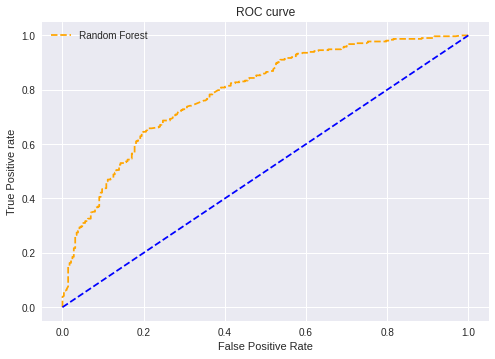

In [48]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Part 2: Given the performance of your model, are you satisfied with the results? Explain.

Keep your response to 1000 characters or less.

TODO: Insert answer here.

## Part 3: Show five test instances in which your model was incorrect. Dive deep and find out why your model was wrong.

Keep your response to 1000 characters or less.

In [49]:
for idx, prediction, label in zip(enumerate(test_df['Sentence_clean']), pred_test, y_test):
    if prediction != label:
        print("Sample", idx, ', has been classified as', prediction, 'and should be', label) 

Sample (3, 'feelgood film thats felt came cinema') , has been classified as 0 and should be 1
Sample (4, 'northern humour positive community represents') , has been classified as 0 and should be 1
Sample (6, 'liked') , has been classified as 0 and should be 1
Sample (10, 'world better garbage theatre today') , has been classified as 0 and should be 1
Sample (12, 'screamy masculine right') , has been classified as 0 and should be 1
Sample (13, 'camera really like movie') , has been classified as 0 and should be 1
Sample (14, 'would casted role ready script') , has been classified as 0 and should be 1
Sample (36, 'soundtrack wasnt terrible either') , has been classified as 0 and should be 1
Sample (38, 'still set got big oyvey scale') , has been classified as 0 and should be 1
Sample (43, 'last minute movie also bad well') , has been classified as 0 and should be 1
Sample (46, 'like armand assante cable company summary sounded interesting watched twice already probably') , has been class

Insert answer here. (Feel free to create new code cells if necessary.)

# Question 2 (Optional): Sentiment Analysis via Deep ML

This question is optional and worth up to 5 extra credit marks.

Use deep learning (e.g., RNNs and variants, CNNs and variants, and/or transformers) to build a model on the same dataset and compare the results with the Shallow ML model.

You may train your own deep ML model (using, e.g., the keras library) or use a pre-trained deep ML model (using, e.g., the transformers library).

In [50]:
# Creating Embeddings using DistilBERT 
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [51]:
# Check longest token sequence in entire text
def checkForMaxTokenSeqInData(text_list, tokenizer_i):
  
    max_val = 0
    for sent in text_list:
        try:
            sent_tok_len = len(tokenizer_i.tokenize(sent))
            max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
        except:
            pass
    
    print(f"The maximum amount of tokens in the dataset is {max_val}")
    return max_val

MAX_VAL = checkForMaxTokenSeqInData(X_train.to_list()+X_val.to_list(),tokenizer)

The maximum amount of tokens in the dataset is 84


In [52]:
def encode_text(tokenizer_i, text, max_text_length):

    # Encode the sentence
    encodedText = tokenizer_i(text,
                             max_length =max_text_length,
                            truncation=True, 
                            add_special_tokens=True, 
                            padding='max_length')
    return encodedText

train_encoding = encode_text(tokenizer, X_train.to_list(), MAX_VAL)
val_encoding = encode_text(tokenizer, X_val.to_list(), MAX_VAL)


###Build Model

In [53]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
def build_model(base_model, trainable=False, params={}):
    inputs = Input(shape = (params['max_seq_length'],),name='input_ids', dtype='int32')
    masks  = Input(shape = (params['max_seq_length'],),name='attention_mask', dtype='int32')

    base_model.trainable = trainable

    dbert_output = base_model(inputs, masks)[0]
    cls_token = dbert_output[:, 0, :]
    dropout_layer = Dropout(params['dropout_rate_1'])(cls_token)
    dense_layer = Dense(params['dense_layer_1_units'],activation='relu')(dropout_layer)
    dropout_layer = Dropout(params['dropout_rate_2'])(dense_layer)
    flatten = Flatten()(dropout_layer)
    probs = Dense(1, activation='sigmoid', name="output")(flatten)

    model = keras.Model(inputs=[inputs, masks], outputs=probs)
    model.summary()
    return model

MODEL_NAME= 'distilbert-base-uncased'

# Configure DistilBERT's initialization
config = DistilBertConfig(output_hidden_states=False)
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)
params={
        "dense_layer_1_units": 128,        
        "dropout_rate_1": 0.2,
	      "dense_layer_2_units": 32,
        "dropout_rate_2": 0.2,
        "regularizer_l2_rate":0.01,
        "max_seq_length":MAX_VAL
        }

model = build_model(dbert_model, trainable=False, params=params)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 84)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 84)]         0           []                               
                                                                                                  
 tf_distil_bert_model_1 (TFDist  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 ilBertModel)                   ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 84, 768),                                                    
                                 hidden_states=None                                         

In [54]:
def compile_model(model, lr):

    optimizer = keras.optimizers.Adam(learning_rate=lr)
    loss = keras.losses.binary_crossentropy
    model.compile(optimizer=optimizer,
              loss=loss,
              metrics='accuracy')
    return model


model = compile_model(model, 0.002)

In [55]:
def train_model(model, model_inputs_and_masks_train, model_inputs_and_masks_val,
    y_train, y_val, batch_size, num_epochs):

    dataset_train = tf.data.Dataset.from_tensor_slices((dict(model_inputs_and_masks_train),y_train))
    dataset_val = tf.data.Dataset.from_tensor_slices((dict(model_inputs_and_masks_val),y_val))

    history = model.fit(dataset_train.shuffle(len(dataset_train)).batch(batch_size), 
                    epochs=num_epochs, 
                    batch_size=batch_size,
                    validation_data=dataset_val.shuffle(len(dataset_val)).batch(batch_size), 
                    verbose=1)
    
    return model, history, dataset_val

tf.config.run_functions_eagerly(True) #use function decorator in TF 2.0, please enable run function eagerly by using below line after importing TensorFlow
model, history, val_dataset = train_model(model, train_encoding, val_encoding, y_train, y_val, batch_size=32, num_epochs=10)

Epoch 1/10
57/57 [==============================] - 25s 445ms/step - loss: 0.4370 - accuracy: 0.7939 - val_loss: 0.2900 - val_accuracy: 0.8833
Epoch 2/10
57/57 [==============================] - 18s 318ms/step - loss: 0.3176 - accuracy: 0.8672 - val_loss: 0.2558 - val_accuracy: 0.9133
Epoch 3/10
57/57 [==============================] - 18s 311ms/step - loss: 0.3028 - accuracy: 0.8661 - val_loss: 0.2763 - val_accuracy: 0.8950
Epoch 4/10
57/57 [==============================] - 18s 308ms/step - loss: 0.3105 - accuracy: 0.8689 - val_loss: 0.2469 - val_accuracy: 0.9067
Epoch 5/10
57/57 [==============================] - 18s 323ms/step - loss: 0.2792 - accuracy: 0.8867 - val_loss: 0.2544 - val_accuracy: 0.9050
Epoch 6/10
57/57 [==============================] - 18s 311ms/step - loss: 0.2888 - accuracy: 0.8778 - val_loss: 0.2384 - val_accuracy: 0.9100
Epoch 7/10
57/57 [==============================] - 18s 313ms/step - loss: 0.2785 - accuracy: 0.8828 - val_loss: 0.2799 - val_accuracy: 0.8883

### Model Evaluation

In [56]:
y_test

0      1
1      1
2      1
3      1
4      1
      ..
595    0
596    0
597    0
598    0
599    0
Name: Polarity, Length: 600, dtype: int64

In [72]:
# Test data - Tensor Conversion
def predict_labels(model, dataset):
  output = model.predict(dataset.batch(1)) 
  predicted_labels = (output>0.50)
  return output, predicted_labels

test_encoding = encode_text(tokenizer, test_df['Sentence_clean'].to_list(), MAX_VAL)
dataset_test = tf.data.Dataset.from_tensor_slices((dict(test_encoding)))
predicted_prob, predicted_labels = predict_labels(model, dataset_test)
#print("predicted_prob:",predicted_prob)
#print("predicted_labels:",predicted_labels)

In [73]:
print(classification_report(y_test, predicted_labels))
fpr, tpr, thresh = roc_curve(y_test, predicted_prob[:], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score_nn = roc_auc_score(y_test, predicted_prob[:])

print('auc_score_test_nn:',auc_score_nn)
print('accuracy_nn %s' % accuracy_score(predicted_labels, y_test))

              precision    recall  f1-score   support

           0       0.92      0.49      0.64       287
           1       0.67      0.96      0.79       313

    accuracy                           0.74       600
   macro avg       0.80      0.73      0.72       600
weighted avg       0.79      0.74      0.72       600

auc_score_test_nn: 0.8966837728623749
accuracy_nn 0.7366666666666667


##Deep ML - Conclusion
